In [2]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister
from qiskit.visualization import plot_histogram

{'1': 2603, '0': 7397}
the actual overlap between the two states is |<\psi_1|\psi_2>|^2 = 0.48570226039551595
the overlap between the two states is ||<\psi_1|\psi_2>||^2 = 0.47940000000000005


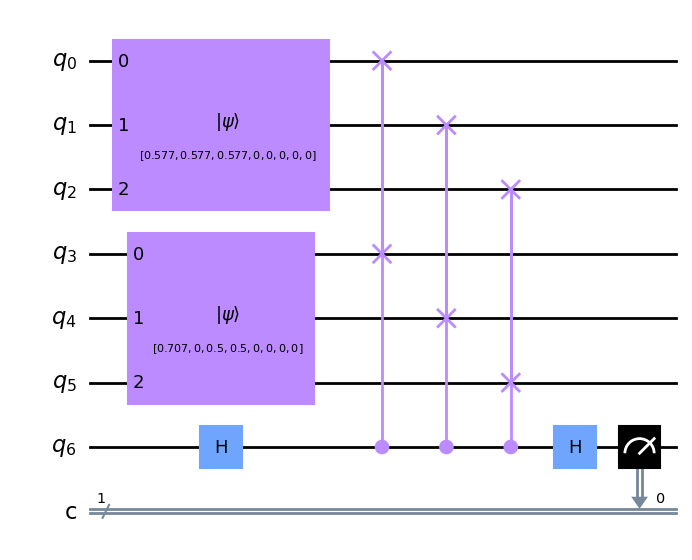

In [6]:
def swap_test(state1, state2, error=1e-3, return_circuit=False):
    '''
    This function calculates the overlap between two states using the swap test.
    The states are given as vectors.
    The function returns the overlap |<\psi_1|\psi_2>|^2.
    '''
    # create a quantum circuit with 3 quantum registers and 1 classical bit
    length = len(state1)
    qubit_number = int(np.ceil(np.log2(length))) # qubit number for the 2nd register
    if 2 ** qubit_number < length:
        qubit_number += 1

    qc = QuantumCircuit(qubit_number * 2 + 1, 1)
    # initialize the first two qubits with the states
    extended_state1 = np.zeros(2 ** qubit_number)
    extended_state2 = np.zeros(2 ** qubit_number)
    extended_state1[:length] = state1
    extended_state2[:length] = state2

    qc.initialize(extended_state1, range(qubit_number))
    qc.initialize(extended_state2, range(qubit_number, 2 * qubit_number))
    
    # apply the Hadamard gate to the third qubit
    qc.h(2 * qubit_number)
    
    # # apply the controlled swap gate
    for i in range(qubit_number):
        qc.cswap(2 * qubit_number, i, i + qubit_number)
    
    # apply the Hadamard gate to the third qubit
    qc.h(2 * qubit_number)
    
    # measure the 3rd qubit
    qc.measure(2 * qubit_number, 0)
    
    # use the qasm simulator
    simulator = Aer.get_backend('qasm_simulator')
    
    # execute the circuit
    shots = int(1 / (error) ** 2)
    result = execute(qc, simulator, shots=shots).result()
    
    # get the counts
    print(result.get_counts(qc))
    counts = result.get_counts(qc)
    
    # get the probability of success
    prob_success = counts['0'] / shots
    overlap = 2 * prob_success - 1
    
    if return_circuit:
        return overlap, qc
    else:
        return overlap
    
# test the function
state1 = [1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3), 0, 0]
state2 = [1/np.sqrt(2), 0, 1/np.sqrt(4), 1/2, 0]
prob_success, circuit = swap_test(state1, state2)
print(f'the actual overlap between the two states is |<\psi_1|\psi_2>|^2 = {np.abs(np.dot(state1, state2)) ** 2}')
print(f'the overlap between the two states is ||<\psi_1|\psi_2>||^2 = {2 * prob_success - 1}')
circuit.draw(output='mpl')